# Assignment 2

by YaoMin(Allen) Zhang

## Goals
1. To develop your version K-Means using the algorithm specified below. (This has been an interview question for jobs using machine learning.)
2. To compare the performance of different implementations.
3. To demonstrate your understanding of clustering algorithms like K-Means, DBSCAN and Hierarchical. (This will also start introducing you to skills needed for data challenges.)
4. To extend the functionality of the developed K-Means implementation through additional parameters. (This shows your ability to develop novel or custom algorithms.)



## Step 1: Develop K-Means

I use np.random.seed() function to generate random indexes to get centroids. I tried several numbers and chose 6 as the seed number to make sure the random number is the same as the example in the assignment.

## Step 2: Performance Comparison

To generate 700 instances of data points in 2-dimensional space, with each of the instances belonging to one of 4 clusters. The coordinates for the instances are returned as X.
The cluster assignments are returned as cluster_assignments.

In [8]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans as SKLearnKMeans
import matplotlib.pyplot as plt
import numpy as np

In [78]:

# Generate data
X, cluster_assignments = make_blobs(n_samples=700, centers=4,
cluster_std=0.60 , random_state=0)

In [79]:
X

array([[-0.84177847,  7.86655225],
       [-1.21515296,  8.01484649],
       [ 1.84320847, -0.07222085],
       ...,
       [-1.83141457,  2.2867542 ],
       [-1.84639796,  3.30491543],
       [ 0.28256062,  4.77250619]])

In [80]:
type(X)

numpy.ndarray

In [81]:
from KMeans import KMeans
# Use the custom KMeans implementation
my_kmeans = KMeans(k=4, max_iterations=500)
my_labels, my_centroids = my_kmeans.fit(X.tolist())

# Use the KMeans from scikit-learn
sklearn_kmeans = SKLearnKMeans(n_clusters=4, max_iter=100, random_state=6)
sklearn_labels = sklearn_kmeans.fit_predict(X)

/Users/mcuallen/opt/anaconda3/envs/introtoai/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


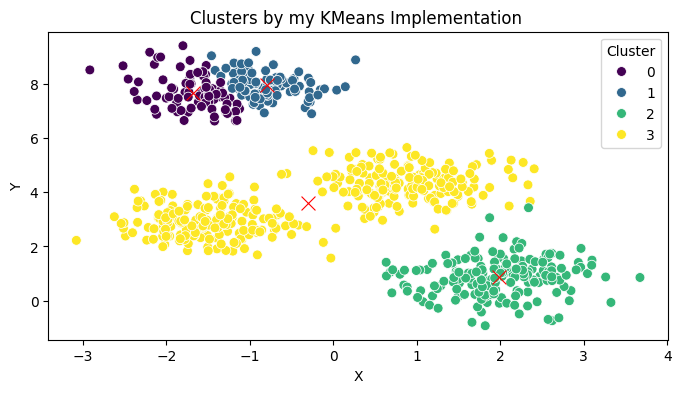

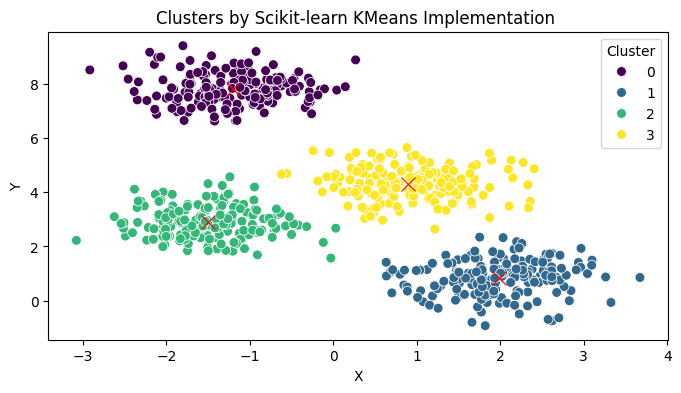

In [82]:
# Function to visualize the clusters
import seaborn as sns

# Function to plot clusters using seaborn
# as Professor prefers seaborn ^_^
def sns_plot_clusters(X, labels, centroids, title):
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis',marker='o', s=50)
    sns.scatterplot(x=np.array(centroids)[:, 0], y=np.array(centroids)[:, 1], color='red', marker='x', s=100)
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(title='Cluster')
    plt.show()

# Visualize the clusters for custom KMeans using seaborn
sns_plot_clusters(X, my_labels, my_centroids, "Clusters by my KMeans Implementation ")

# Visualize the clusters for scikit-learn KMeans using seaborn
sns_plot_clusters(X, sklearn_labels, sklearn_kmeans.cluster_centers_, "Clusters by Scikit-learn KMeans Implementation ")
